In [1]:
from tensorflow.keras.models import load_model

model = load_model('best_model', compile=False)  # Load the trained model


2023-06-10 14:03:45.341393: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-06-10 14:03:48.607833: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
from PIL import Image
import numpy as np
import os

image_folder = './images/test'  # Folder containing the images for prediction
output_masks = []  # List to store the output masks
input_images = []
# Iterate over each image in the folder
for filename in os.listdir(image_folder):
    image_path = os.path.join(image_folder, filename)
    image = Image.open(image_path)
    image = image.resize((128, 128))  # Resize the image to (128, 128)

    # Convert the resized image to a NumPy array
    image_array = np.array(image)

    # Perform any necessary preprocessing on the image array

    # Append the preprocessed image to the input list
    input_images.append(image_array)

# Convert the input list to a NumPy array
input_images = np.array(input_images)


In [3]:
# Make predictions on the input images
predictions = model.predict(input_images)

# Perform any necessary post-processing on the predictions

# Convert the predictions to masks as NumPy arrays
output_masks = np.argmax(predictions, axis=-1)


1/1 [==============================] - 1s 1s/step


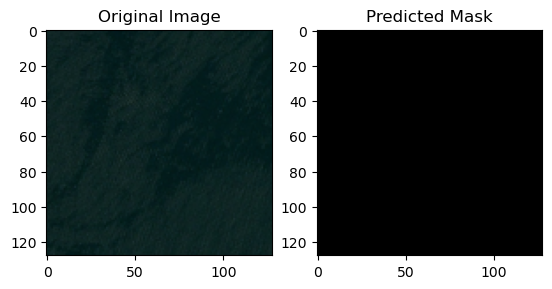

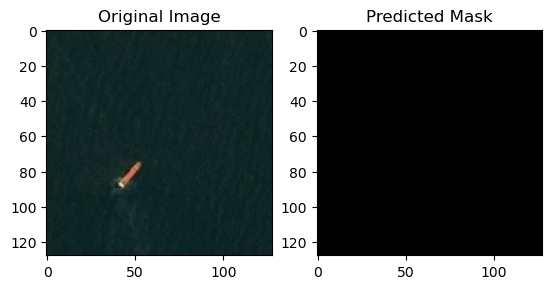

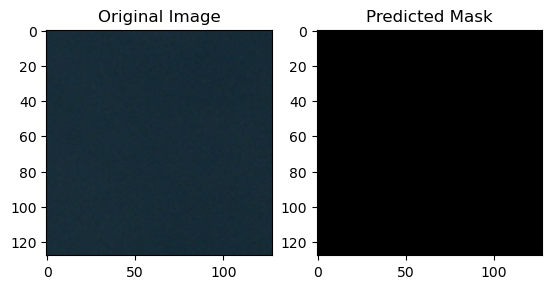

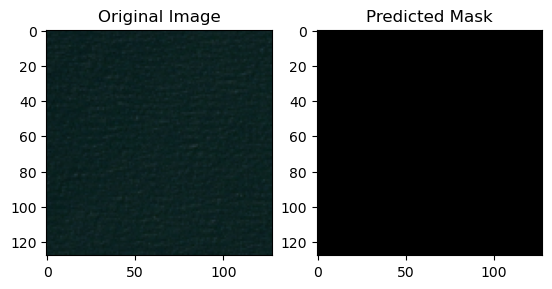

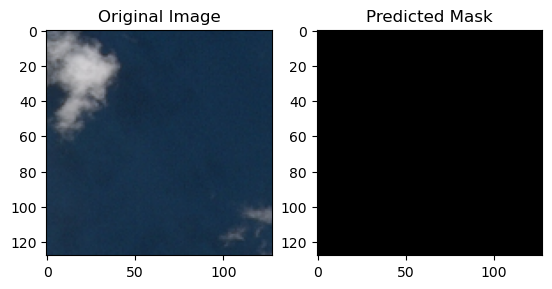

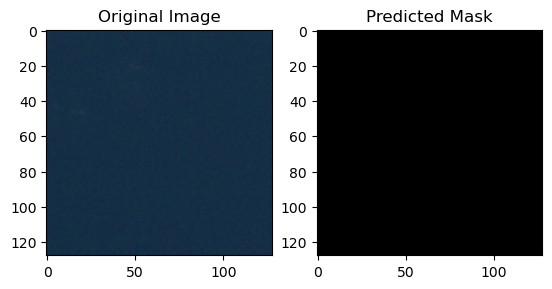

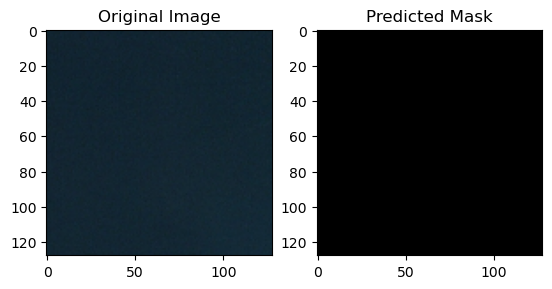

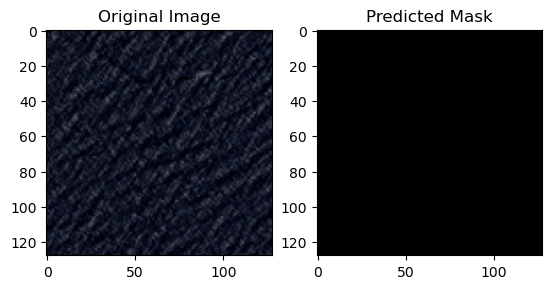

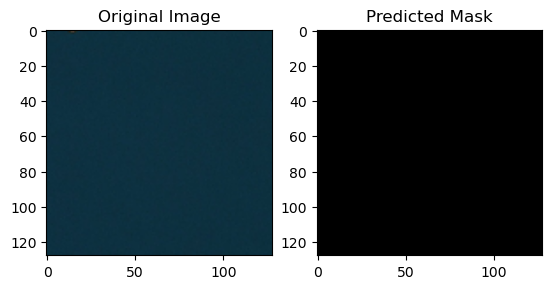

In [6]:
import matplotlib.pyplot as plt

# Iterate over the original images and predicted masks
for i in range(len(input_images)):
    image = input_images[i]
    mask = output_masks[i]

    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Original Image')

    # Display the predicted mask
    plt.subplot(1, 2, 2)
    plt.imshow(mask, cmap='gray')  # Assuming the mask is a grayscale image
    plt.title('Predicted Mask')

    plt.show()
